In [1]:
#load packages and directory
import scanpy as sc
import seaborn as sns
import numpy as np
import anndata as ad
import scvi
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import biomart
directory = '/Users/david/Dropbox/RNASeq/Chen2021'

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [17]:
#downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE118020
#already quality-controlled
adata = sc.read(directory+'/Data/GSE118020_expression_matrix.csv')

In [18]:
adata = adata.transpose()

In [20]:
adata.obs['Sample']=[x[27:] for x in adata.obs.index.to_numpy()]

In [21]:
from scipy.sparse import csr_matrix
adata.X = csr_matrix(adata.X)

In [22]:
sc.pp.filter_genes(adata, min_cells = 1)
adata.X.shape

(47576, 20999)

In [23]:
adata.layers['counts'] = adata.X.copy() #save a raw counts version

In [24]:
adata_scvi = adata.copy()

In [25]:
#integrate all cells
sc.pp.highly_variable_genes(adata_scvi, n_top_genes = 2000, subset = True, layer='counts', flavor = 'seurat_v3', batch_key='Sample')
adata_scvi.X.shape

(47576, 2000)

In [26]:
scvi.model.SCVI.setup_anndata(adata_scvi, layer = 'counts',
                             batch_key='Sample')
model = scvi.model.SCVI(adata_scvi)

In [27]:
model.train() #may take a while without GPU

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 168/168: 100%|█| 168/168 [22:45<00:00,  8.94s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=168` reached.


Epoch 168/168: 100%|█| 168/168 [22:45<00:00,  8.13s/it, v_num=1, train_loss_step


In [28]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [32]:
del(adata_scvi)

In [29]:
sc.pp.neighbors(adata, use_rep = 'X_scVI', n_neighbors = 50)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


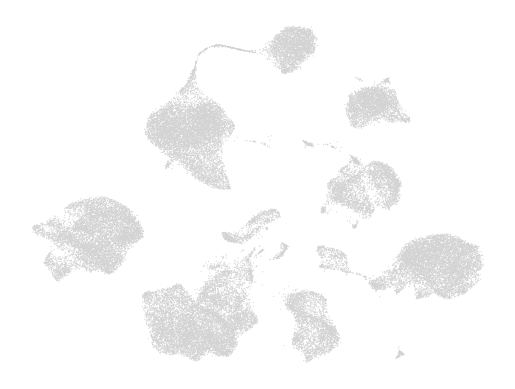

In [30]:
sc.tl.umap(adata, min_dist=0.5)
sc.pl.umap(adata, frameon = False)

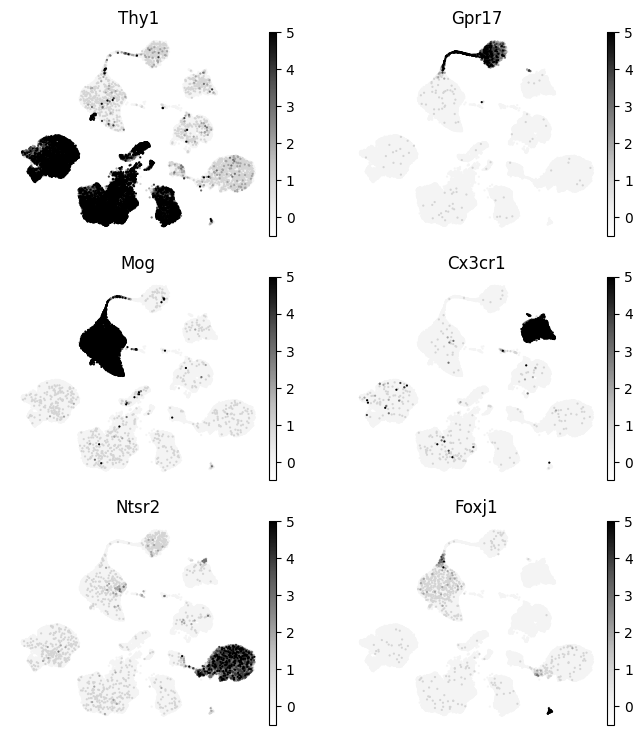

In [31]:
plt.figure(figsize = (8,9))
um = plt.subplot(3,2,1)
um = sc.pl.umap(adata, color = ['Thy1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,2)
um = sc.pl.umap(adata, color = ['Gpr17'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,3)
um = sc.pl.umap(adata, color = ['Mog'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,4)
um = sc.pl.umap(adata, color = ['Cx3cr1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,5)
um = sc.pl.umap(adata, color = ['Ntsr2'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,6)
um = sc.pl.umap(adata, color = ['Foxj1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)

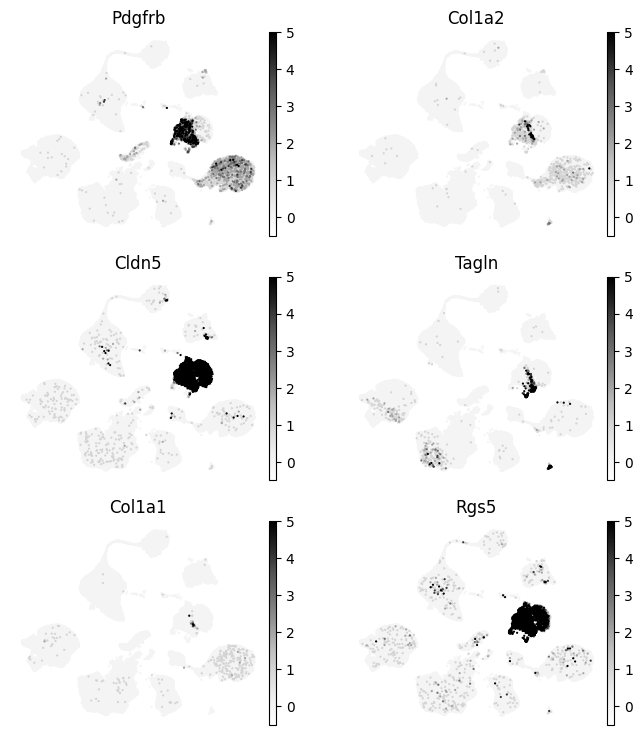

In [37]:
plt.figure(figsize = (8,9))
um = plt.subplot(3,2,1)

#pericyte
um = sc.pl.umap(adata, color = ['Pdgfrb'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,2)

#fibroblast
um = sc.pl.umap(adata, color = ['Col1a2'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,3)

#endothelial
um = sc.pl.umap(adata, color = ['Cldn5'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,4)
um = sc.pl.umap(adata, color = ['Tagln'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,5)
um = sc.pl.umap(adata, color = ['Col1a1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,6)
um = sc.pl.umap(adata, color = ['Rgs5'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)

In [35]:
#cluster
sc.tl.leiden(adata, resolution = 0.1)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


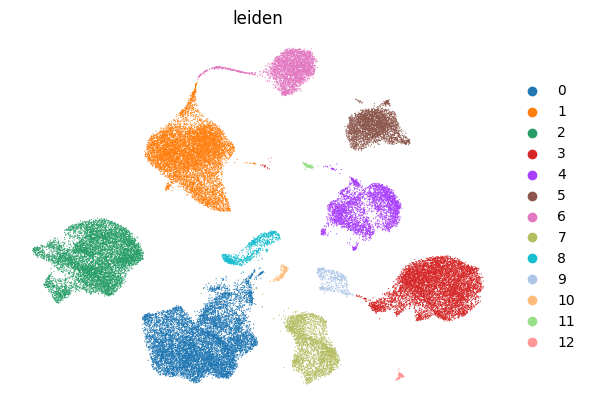

In [36]:
sc.pl.umap(adata, color = ['leiden'], frameon = False)

In [38]:
cell_type = {"0":"Neurons",
             "1":"Other",
"2":"Neurons",
"3":"Other",
"4":"Other",
"5":"Other",
"6":"Other",
"7":"Neurons",
"8":"Neurons",
"9":"Other", 
"10":"Neurons", 
"11":"Other",  
"12":"Other",              
}

adata.obs['celltype'] = adata.obs.leiden.map(cell_type)

In [39]:
ctcolorsN = {"Neurons":(0.71, 0.88, 0.54),
            "Other":(0.8, 0.8, 0.8),
           }

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


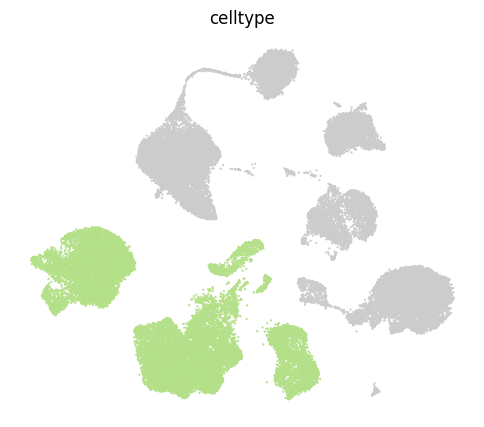

In [40]:
plt.figure(figsize = (6,5))
um = plt.subplot(1,1,1)
um = sc.pl.umap(adata, color = ['celltype'], frameon = False, size=10, ax = um, palette = ctcolorsN, show=False, legend_loc='off right')
plt.savefig(directory + '/Figures/cellsUMAPN.png')

In [41]:
#change Drd1a to Drd1
genelist = adata.var.index
genelist = np.array(genelist)
genelist[genelist=='Drd1a']='Drd1'
adata.var.index = genelist

In [43]:
adata.write_h5ad(directory + '/combined.h5ad')

In [42]:
isneuron = adata.obs['leiden'].isin(['0','2','7','8','10'])

In [47]:
adata = adata[isneuron]

In [ ]:
#prepare for Map My Cell

In [44]:
def get_ensembl_mappings():                                   
    # Set up connection to server                                               
    server = biomart.BiomartServer('http://useast.ensembl.org/biomart')         
    mart = server.datasets['mmusculus_gene_ensembl']                            
                                                                                
    # List the types of data we want                                            
    attributes = ['mgi_symbol','ensembl_gene_id']
                                                                                
    # Get the mapping between the attributes                                    
    response = mart.search({'attributes': attributes})                          
    data = response.raw.data.decode('ascii')                                    
                                                                                
    ensembl_to_genesymbol = {}                                                  
    # Store the data in a dict                                                  
    for line in data.splitlines():                                              
        line = line.split('\t')                                                 
        gene_symbol = line[0]                                                   
        ensembl_gene = line[1]                                                  
        ensembl_to_genesymbol[gene_symbol] = ensembl_gene                      
                                                                                
    return ensembl_to_genesymbol

In [45]:
mappings = get_ensembl_mappings()

In [46]:
varlist = adata.var.index.to_numpy()
varlistens = varlist.copy()
include = np.full(len(varlist),False)
gdb = list(mappings.keys())
for x in range(0,len(varlist)):
    if np.isin(varlist[x],gdb):
        varlistens[x]=mappings[varlist[x]]
        include[x]=True

In [48]:
adataS = ad.AnnData(adata[:,include].layers['counts'])
adataS.var.index=varlistens[include]
adataS.obs.index=adata.obs.index

In [51]:
adataS.write_h5ad(directory + '/neuronsMMC.h5ad')

In [52]:
mmcdata = pd.read_csv(directory + '/mmc.csv', header=4, index_col=0)

In [53]:
adata.obs['class']=mmcdata['class_name'].astype('category')
adata.obs['subclass']=mmcdata['subclass_name'].astype('category')
adata.obs['supertype']=mmcdata['supertype_name'].astype('category')
adata.obs['cluster']=mmcdata['cluster_name'].astype('category')

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_64310/967811297.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['class']=mmcdata['class_name'].astype('category')


In [54]:
adata.obs

,Sample,leiden,celltype,class,subclass,supertype,cluster
AAACCTGAGTGAACGC.NAc_Sample1,1,2,Neurons,09 CNU-LGE GABA,062 STR D2 Gaba,0279 STR D2 Gaba_6,0986 STR D2 Gaba_6
AACCGCGTCAGCTCTC.NAc_Sample1,1,2,Neurons,09 CNU-LGE GABA,062 STR D2 Gaba,0279 STR D2 Gaba_6,0986 STR D2 Gaba_6
ACACCCTAGCTGAACG.NAc_Sample1,1,2,Neurons,09 CNU-LGE GABA,062 STR D2 Gaba,0279 STR D2 Gaba_6,0986 STR D2 Gaba_6
CCGTGGAAGCTACCGC.NAc_Sample1,1,2,Neurons,09 CNU-LGE GABA,062 STR D2 Gaba,0279 STR D2 Gaba_6,0986 STR D2 Gaba_6
CCTCAGTTCTTCCTTC.NAc_Sample1,1,2,Neurons,09 CNU-LGE GABA,062 STR D2 Gaba,0279 STR D2 Gaba_6,0986 STR D2 Gaba_6
...,...,...,...,...,...,...,...
CAAGAAAAGCTATGCT.NAc_Sample10,10,2,Neurons,09 CNU-LGE GABA,062 STR D2 Gaba,0279 STR D2 Gaba_6,0986 STR D2 Gaba_6
TTCGAAGAGTGCCAGA.NAc_Sample12,12,0,Neurons,09 CNU-LGE GABA,061 STR D1 Gaba,0268 STR D1 Gaba_4,0954 STR D1 Gaba_4
TACTTGTAGTACACCT.NAc_Sample4,4,0,Neurons,09 CNU-LGE GABA,062 STR D2 Gaba,0275 STR D2 Gaba_2,0973 STR D2 Gaba_2
AAGGTTCGTAATTGGA.NAc_Sample11,11,0,Neurons,09 CNU-LGE GABA,061 STR D1 Gaba,0266 STR D1 Gaba_2,0949 STR D1 Gaba_2


In [55]:
del(adata.obsm,adata.obsp,adata.uns,adata.obs['leiden'],adata.obs['celltype'],adata.var)

In [56]:
adata

AnnData object with n_obs × n_vars = 21379 × 20999
    obs: 'Sample', 'class', 'subclass', 'supertype', 'cluster'
    layers: 'counts'

In [57]:
adata.write_h5ad(directory + '/neurons.h5ad')

In [58]:
#get color palettes
allMeta = pd.read_csv('/Users/david/Dropbox/RNASeq/AllenPAL/Data/cell_metadata_with_cluster_annotation.csv')

(classes,ci) = np.unique(allMeta['class'].to_numpy(),return_index=True)
cc = allMeta['class_color'].to_numpy()[ci]
classp = dict(zip(classes,cc))
classp['None']=(0.8,0.8,0.8,0.2)

(subclasses,si) = np.unique(allMeta['subclass'].to_numpy(),return_index=True)
scc = allMeta['subclass_color'].to_numpy()[si]
subclassp = dict(zip(subclasses,scc))
subclassp['None']=(0.8,0.8,0.8,0.2)

ntlist=allMeta['neurotransmitter'][allMeta['neurotransmitter']==allMeta['neurotransmitter']].to_numpy()
ntclist=allMeta['neurotransmitter_color'][allMeta['neurotransmitter']==allMeta['neurotransmitter']].to_numpy()
(neurotransmitters,ni) = np.unique(ntlist,return_index=True)
nc = ntclist[ni]
neurotransmitterp = dict(zip(neurotransmitters,nc))
neurotransmitterp['None']=(0.8,0.8,0.8,0.2)

del(allMeta)

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_64310/3778227727.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  allMeta = pd.read_csv('/Users/david/Dropbox/RNASeq/AllenPAL/Data/cell_metadata_with_cluster_annotation.csv')


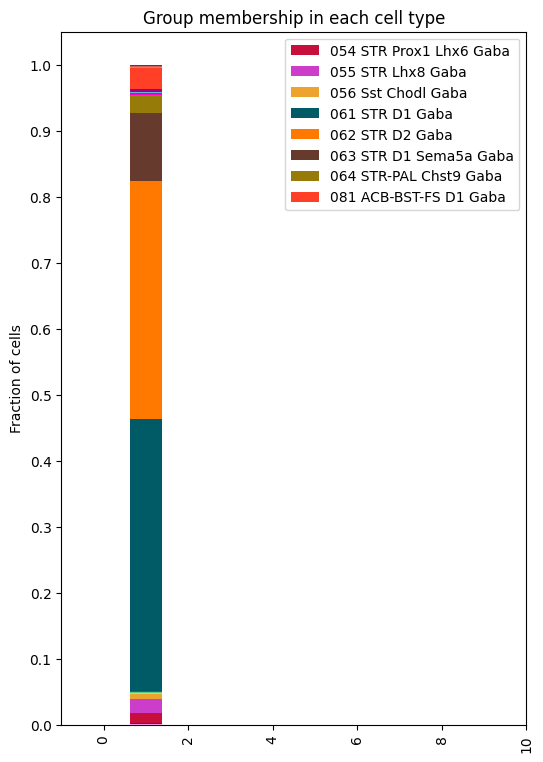

In [59]:
order = [1]
groupnames = np.unique(adata.obs['subclass'])
typecount=np.zeros((len(groupnames),len(order)))
for g in range(0,len(groupnames)):   
    for t in range(0,len(order)):
        typecount[g,t]=np.sum((adata.obs['subclass']==groupnames[g]))                   

tcn = np.divide(typecount,np.sum(typecount,axis=0))

width = 0.75

fig, ax = plt.subplots(figsize = (6,9))
bottom = np.zeros(len(order))

lhs=[]
inc=np.full((len(groupnames),1),False,dtype='bool')
inccolors=[]
for g in range(0,len(groupnames)):
    p = ax.bar(order, tcn[g,:], width, label=groupnames[g], bottom=bottom, color=subclassp[groupnames[g]])
    bottom += tcn[g,:]
    if np.max(tcn[g,0:5])>=0.005:
        lhs.append(p)
        inc[g]=True
        inccolors.append(subclassp[groupnames[g]])
inc=inc.squeeze()

ax.legend(handles=lhs,loc="upper right", ncols=1)

plt.title('Group membership in each cell type')
plt.xlim((-1,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Fraction of cells')
plt.savefig(directory + '/Figures/propSubclass.svg')